### 1. **Import Libraries**  
   - Uses libraries like `pandas`, `numpy`, `matplotlib`, `seaborn`, and `sklearn` for data processing, visualization, and modeling.
   - `SMOTE` from `imblearn` is used for handling class imbalance.

In [7]:
#Import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

### 2. **Load and Explore Data**  
   - Reads the dataset (`heart_disease_uci.csv`).
   - Displays the shape, first few rows, basic statistics, and missing values.

In [9]:
# Load dataset
df = pd.read_csv("heart_disease_uci.csv")

# Display initial data
print("Initial Data Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

# Data Exploration
print("\nBasic Statistics:")
print(df.describe())

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

Initial Data Shape: (920, 16)

First few rows:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             nor

### 3. **Data Preprocessing**  
   - **Handling Missing Values**: Uses `SimpleImputer` to fill missing numerical values with the mean.
   - **Removing Duplicates**: Drops duplicate rows.
   - **Encoding Categorical Variables**: Converts categorical columns into numeric using `LabelEncoder`.
   - **Feature Scaling**: Standardizes numerical features using `StandardScaler`.
   - **Ensures Target Variable is Categorical**: Converts the `num` column to an integer.
   - **Splitting Data** : *Separates features (`X`) and target (`y`), dropping irrelevant columns like `id`.*
                          *Splits into training (80%) and testing (20%) using `train_test_split`.*
   - **Handling Class Imbalance** : Applies `SMOTE` (Synthetic Minority Over-sampling Technique) to balance classes.

In [13]:
# Handling missing values
imputer = SimpleImputer(strategy='mean')
numerical_features = df.select_dtypes(include=['number']).columns
df[numerical_features] = imputer.fit_transform(df[numerical_features])

# Remove duplicates
df.drop_duplicates(inplace=True)

# Encoding categorical variables
le = LabelEncoder()
categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    df[col] = le.fit_transform(df[col])

# Feature Scaling
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Ensure 'num' is categorical
df['num'] = df['num'].astype(int)  # Convert to integer first
print("\nUnique values in target variable:", df['num'].unique())

# Split features and target
X = df.drop(columns=['num', 'id'])  # Removing 'id' as it's not relevant for prediction
y = df['num']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


Unique values in target variable: [0 1 2]


### 4. **Model Training & Evaluation**  

- **Logistic Regression Model**  
     - Trains on balanced data.
     - Evaluates with accuracy, classification report, and cross-validation scores.
     - Displays a confusion matrix.


=== Logistic Regression ===

Logistic Regression Results:
Accuracy: 0.6902173913043478

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.73      0.82       154
           1       0.29      0.50      0.37        26
           2       0.06      0.25      0.09         4

    accuracy                           0.69       184
   macro avg       0.43      0.49      0.43       184
weighted avg       0.82      0.69      0.74       184


Cross-validation scores: [0.67810026 0.7414248  0.68073879 0.65343915 0.6984127 ]
Average CV score: 0.6904231408189192


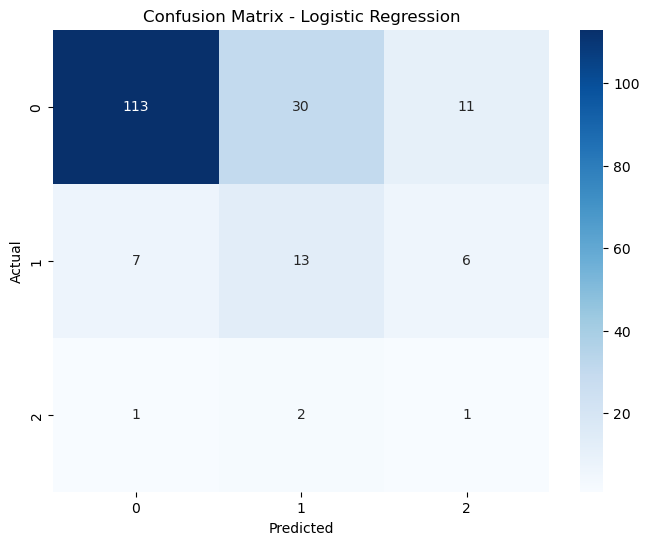

In [17]:
# Model 1: Logistic Regression
print("\n=== Logistic Regression ===")
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_balanced, y_train_balanced)

# Predictions and evaluation for Logistic Regression
y_pred_log = log_model.predict(X_test)
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

# Cross-validation score for Logistic Regression
cv_scores_log = cross_val_score(log_model, X_train_balanced, y_train_balanced, cv=5)
print("\nCross-validation scores:", cv_scores_log)
print("Average CV score:", cv_scores_log.mean())

# Visualization: Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

 - **Random Forest Model**  
     - Trains with 200 trees (`n_estimators=200`) and depth limit (`max_depth=10`).
     - Evaluates with accuracy, classification report, and cross-validation.
     - Displays a confusion matrix and feature importance visualization.


=== Random Forest ===

Random Forest Results:
Accuracy: 0.7771739130434783

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       154
           1       0.31      0.31      0.31        26
           2       0.22      0.50      0.31         4

    accuracy                           0.78       184
   macro avg       0.47      0.56      0.50       184
weighted avg       0.80      0.78      0.78       184


Cross-validation scores: [0.91292876 0.94459103 0.92084433 0.91534392 0.93915344]
Average CV score: 0.9265722941184682


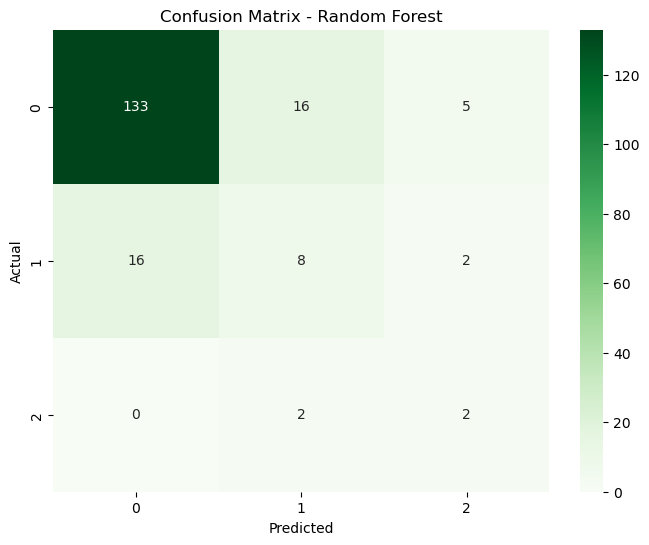

In [20]:
# Model 2: Random Forest Classifier
print("\n=== Random Forest ===")
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

# Predictions and evaluation for Random Forest
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Cross-validation score for Random Forest
cv_scores_rf = cross_val_score(rf_model, X_train_balanced, y_train_balanced, cv=5)
print("\nCross-validation scores:", cv_scores_rf)
print("Average CV score:", cv_scores_rf.mean())

# Visualization: Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 5. **Model Comparison**  
   - Prints accuracy for both models:
   - **Random Forest Accuracy**: 77.71%
     - **Logistic Regression Accuracy**: 69.02%
   - Random Forest performs better.

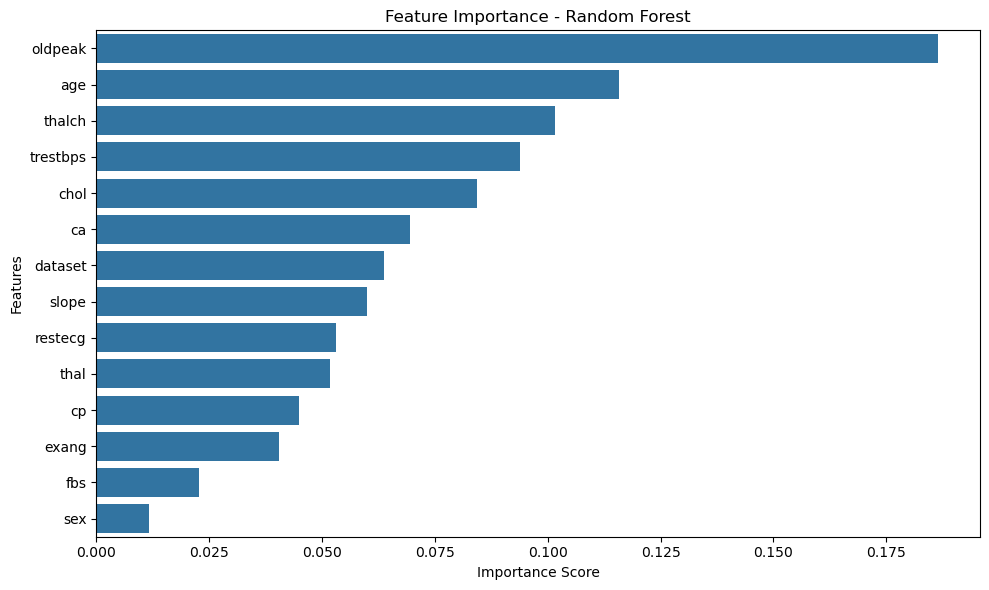


=== Model Comparison ===
Logistic Regression Accuracy: 0.6902173913043478
Random Forest Accuracy: 0.7771739130434783


In [23]:
# Feature Importance Visualization
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Print model comparison
print("\n=== Model Comparison ===")
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))